

# Project: Investigate a Dataset - [No show appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

INTRODUCTION: This dataset collects information from 100k medical appointments in Brazil and is focused on the question 
of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1. ScheduledDay: tells us on what day the patient set up their appointment.
2. Neighborhood: indicates the location of the hospital.
3. Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. Hypertension: indicates wether the patient is hypertensive or not
5. Diabetes: tells us if the patient is diabetic
6. Alcoholism: tells us if the patient has a bad drinking habit
7. Handicap: tells us if the patient is handicapped
8. AppointmentDay: tells us the date and time given to the patient for his/her appointment  
9. Age: tells us the patients age
10. SMS_received: tells us if the patients received a reminder for their appointment
11. No-show: tells us if the patients showed up or not for their appointment

Note that we have key rows, 0 = NO and 1 = YES



### Question(s) for Analysis

QUESTIONS:

1. which gender showed up the most for their appointment

2. which neighbourhood recorded the lowest rate of showing up for their appointments

3. which gender has the highest rate of alcoholism

4. which neighbourhood has the highest show up rate for appointment.

5. which gender has more hypertensive patients.

 


Load the datasets



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%  matplotlib inline

In [3]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.8MB/s eta 0:00:01 1% |▍                               | 133kB 5.0MB/s eta 0:00:03    26% |████████▍                       | 2.7MB 28.9MB/s eta 0:00:01    51% |████████████████▌               | 5.4MB 18.9MB/s eta 0:00:01    62% |████████████████████            | 6.5MB 23.2MB/s eta 0:00:01    73% |███████████████████████▌        | 7.7MB 20.9MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.5MB/s eta 0:00:01  7% |██▎                             | 942kB 27.1MB/s eta 0:00:01    16% |█████▏                          | 2.2MB 22.3MB/s eta 0:00:01    25% |████████▎                       | 3.5MB 27.4MB/s eta 0:00:01    35% |███████████▎                    | 4.7MB 27.6MB/s eta 0:00:01    54% |█████████████████▌              | 7.3MB 27.4MB/s eta 0:00:01    74% |███████████████████████▊        | 9.9MB 26.1MB/s eta 0:00:01    92% |█████████████████████████████▌  | 12.3MB 27.6MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-

<a id='wrangling'></a>
## Data Wrangling


### General Properties



Read the csv file.



In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Check for incomplete data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for duplicates

In [4]:
df.duplicated().sum()

0

There are no duplicates

Check for null values

In [5]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no null columns or values.

Check the data types of each column

In [6]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

Check for percentiles,mean values,etc

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We check for columns and rows present in our document

In [8]:
df.shape

(110527, 14)

The document consist of 110527 rows and 14 columns

# Data Cleaning

Taking a clearer look at the document, we would see that some columns were wrongly spelt which needs to be corrected, some consist of iphens which we could replace with underscores and the data tyes for the patientId, scheduledDate and AppointmentDay were set as objects which we would inturn convert to datetime.

First We convert patient id which is float back to integer, patient id should not be having decimals

In [9]:
df['PatientId'] = df['PatientId'].astype(int)
df.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No-show           object
dtype: object

We also change scheduleday and appointmentday from object to datetime ScheduleDay

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay            object
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

We do the same for Appointmentday

In [11]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

We rename the column saved as 'handcap' to 'handicapped' and 'hipertension' to 'hypertension'

In [12]:
df.rename(columns = {'Handcap':'handicapped'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,handicapped,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We do the same for 'hipertension' to 'hypertension'

In [13]:
df.rename(columns = {'Hipertension':'hypertension'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicapped,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We do the same for 'hipertension' to 'hypertension'

In [14]:
df.rename(columns = {'No-show':'No_show'}, inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicapped,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


We then check the columns to be sure the changes have been made

In [15]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'hypertension',
       'Diabetes', 'Alcoholism', 'handicapped', 'SMS_received', 'No_show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis



###  Which Gender showed up the most for their appointment


We first groupby gender and get the value counts


In [16]:
df.groupby('Gender') ['No_show'].value_counts()

Gender  No_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: No_show, dtype: int64

we then group by gender again and get value counts using normalize=True (which helps us get the proportions)


In [17]:
df.groupby('Gender') ['No_show'].value_counts(normalize=True)


Gender  No_show
F       No         0.796854
        Yes        0.203146
M       No         0.800321
        Yes        0.199679
Name: No_show, dtype: float64

We then use the Unstack() operation to move the row index to the column index

In [18]:
df.groupby('Gender') ['No_show'].value_counts(normalize=True).unstack('Gender')

Gender,F,M
No_show,,
No,0.796854,0.800321
Yes,0.203146,0.199679


Now we can plot a bar chart from this result

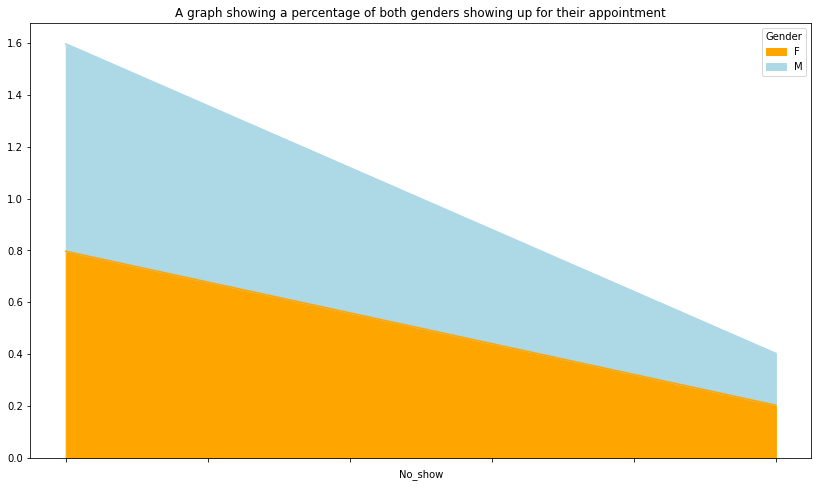

In [19]:
df.groupby('Gender') ['No_show'].value_counts(normalize=True).unstack('Gender').plot(title='A graph showing a percentage of both genders showing up for their appointment',kind='Area',figsize=[14, 8],rot=0,color=['orange','lightblue']);

0.8% of males compared to the 0.7% of females showed up for their appointment
0.1% of males compared to 0.2% of females did not show up for their appointment

# Which Gender has the highest rate of Alcoholism

We first create a function for our plot statement to avoid repeting the same code

In [20]:
def my_plot(df,title,kind,color,rot):
 df.plot(title=title, kind=kind, figsize=[14, 6],color=color, rot=rot)
df_Gender=df.groupby('Gender')['No_show'].value_counts(normalize=True).mul(100).unstack('Gender')


This function originally does all the breakdown and plots the graph dirctly
but we need to show a breakdown of how we the code solves it before arriving at the graph.

 we group by gender and get the count for Alcoholism for each gender

In [21]:

df.groupby(['Gender'])['Alcoholism'].value_counts()

Gender  Alcoholism
F       0             70617
        1              1223
M       0             36550
        1              2137
Name: Alcoholism, dtype: int64

We again group by gender and get the percentage for alcoholism for each gender To do this, we use .mul(100) which multiplies the proportion by 100 to give us the percentage.

In [24]:
df.groupby(['Gender'])['Alcoholism'].value_counts(normalize=True).mul(100)

Gender  Alcoholism
F       0             98.297606
        1              1.702394
M       0             94.476181
        1              5.523819
Name: Alcoholism, dtype: float64

We then plot our bar chart using our defined function.

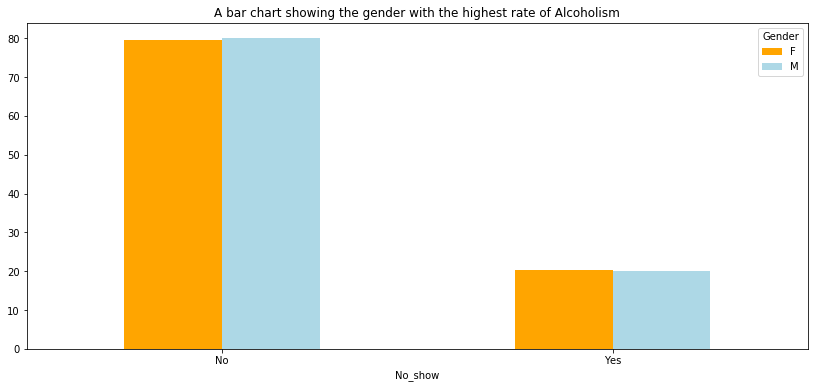

In [115]:
my_plot(df_Gender,title='A bar chart showing the gender with the highest rate of Alcoholism',kind='bar',color=['orange','lightblue'], rot=0)

# which neighbourhood recorded the lowest rate of showing up for their appointments

To do this, we run the code to show the neighbourhood with the least No-show rate by setting No-show as yes

In [25]:

df[df['No_show']=='Yes'].groupby(['Neighbourhood','No_show']).size().reset_index(name='count')

,Neighbourhood,No_show,count
0,AEROPORTO,Yes,1
1,ANDORINHAS,Yes,521
2,ANTÔNIO HONÓRIO,Yes,50
3,ARIOVALDO FAVALESSA,Yes,62
4,BARRO VERMELHO,Yes,91
5,BELA VISTA,Yes,384
6,BENTO FERREIRA,Yes,193
7,BOA VISTA,Yes,58
8,BONFIM,Yes,550
9,CARATOÍRA,Yes,591


We then plot a barh chat for a horizontal plot as it avoids having to angle the thick labels

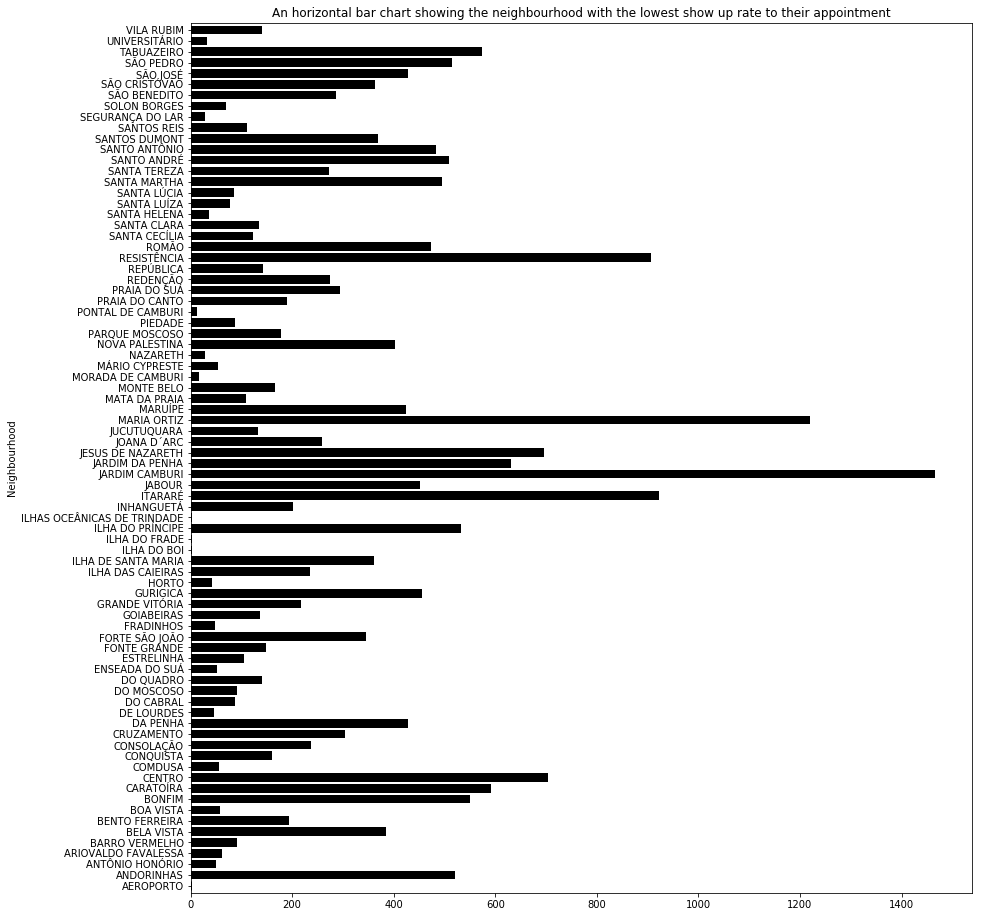

In [116]:
df[df['No_show']=='Yes'].groupby(['Neighbourhood','No_show']).size().unstack() ['Yes'].plot(kind='barh',title='An horizontal bar chart showing the neighbourhood with the lowest show up rate to their appointment', edgecolor='black', figsize=[14, 16],rot=0,width=0.8, color=['black']);

from the above chat, we would see that Aeroporto, Ilha Do Boi, Ilha Do Frade, and Ilhas Oceanicas De Trinidade recorded the lowest show up rate

# Which Neighbourhood has the highest show up rate

To do this, we would run the code to show the neighbourhood with the lowest No-show rate

In [117]:
df[df['No_show']=='No'].groupby(['Neighbourhood','No_show']).size().reset_index(name='count')

,Neighbourhood,No_show,count
0,AEROPORTO,No,7
1,ANDORINHAS,No,1741
2,ANTÔNIO HONÓRIO,No,221
3,ARIOVALDO FAVALESSA,No,220
4,BARRO VERMELHO,No,332
5,BELA VISTA,No,1523
6,BENTO FERREIRA,No,665
7,BOA VISTA,No,254
8,BONFIM,No,2223
9,CARATOÍRA,No,1974


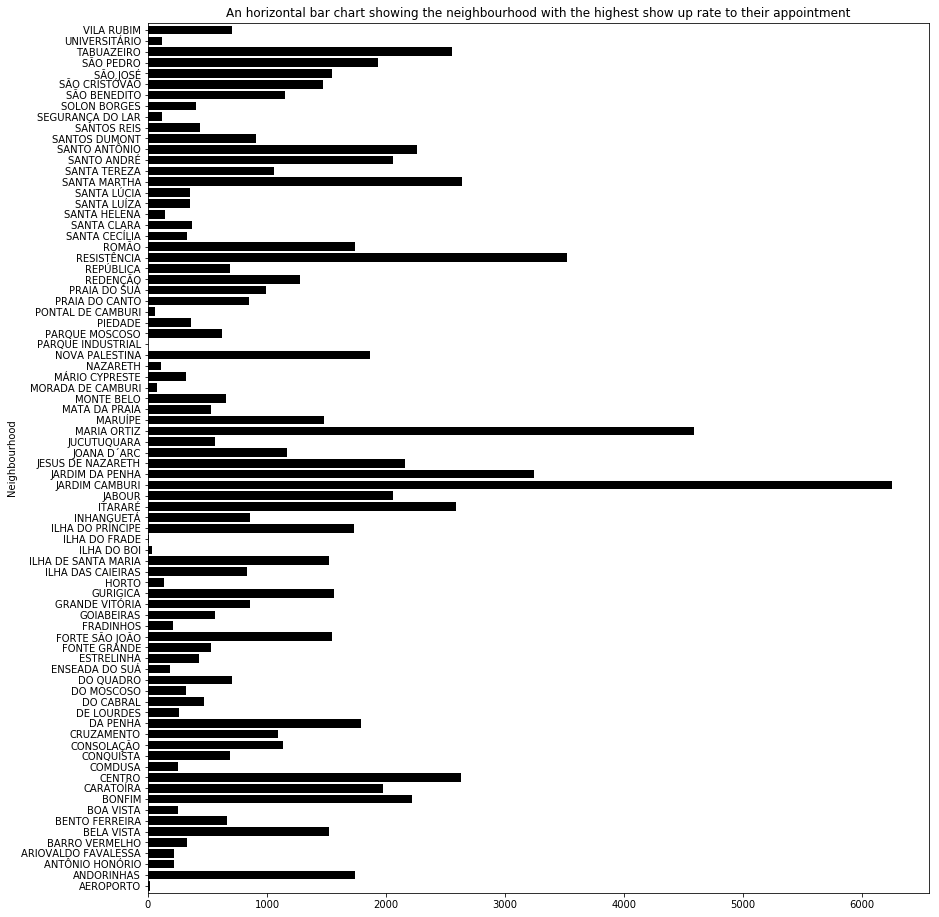

In [118]:
df[df['No_show']=='No'].groupby(['Neighbourhood','No_show']).size().unstack() ['No'].plot(kind='barh',title='An horizontal bar chart showing the neighbourhood with the highest show up rate to their appointment', edgecolor='black', figsize=[14, 16],rot=0,width=0.8, color=['black']);

From the above chart, we would see that Jadim camburi is the neighbourhood with the highest showup rate

# Which gender has more hypertensive patients

To find the gender with more hypertensive people, we run the code that gives us the genders and the rate of hypertension


We first group by gender and get the count for Hypertension for each gender

In [29]:
df.groupby(['Gender'])['hypertension'].value_counts()

Gender  hypertension
F       0               56501
        1               15339
M       0               32225
        1                6462
Name: hypertension, dtype: int64

we again group by gender and get the percentage for hypertension for each gender To do this, we use .mul(100) which multiplies the proportion by 100 to give us the percentage.

In [30]:
df.groupby(['Gender'])['hypertension'].value_counts(normalize=True).mul(100)

Gender  hypertension
F       0               78.648385
        1               21.351615
M       0               83.296715
        1               16.703285
Name: hypertension, dtype: float64

We then plot our bar chart using our defined function

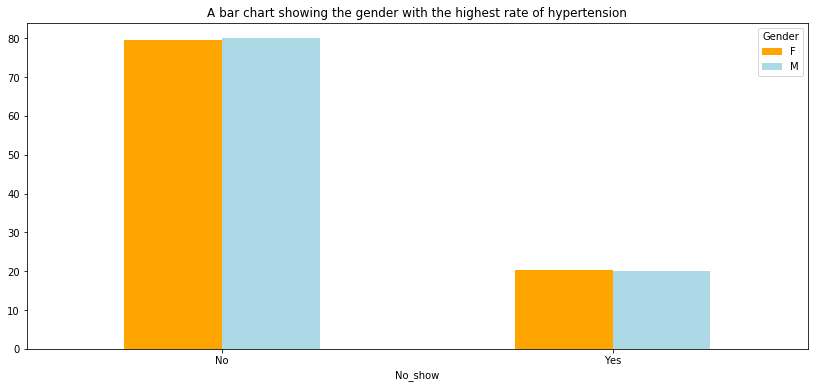

In [119]:
my_plot(df_Gender,title='A bar chart showing the gender with the highest rate of hypertension',kind='bar',color=['orange','lightblue'], rot=0)

<a id='conclusions'></a>
## Conclusions
On viewing the data, i was curious to quickly explore it. With a very large amount of rows i couldn't start doing that on an excel sheet, so i decided to run them on the jupyter notebook provided. Are there duplicate data? do we have null columns? what kind of data types are used for the columns? how many rows and columns do we have? there is only one way to know, which is running this csv file in the jupyter notebook provided. On exploration, i discovered that the The dataset has 110,527 rows and 14 columns with no duplicates, no null values but with little deficits such as columnns being mis-spelt, and wrong data types being used for some of the columns. I proceeded to doing a data cleaning by changing the datat types to the correct format, and i also renamed column headings that were spelt wrongly such as the hipertension and hadcap, changing them back to the correct spellings. Also i dont want my column names having iphens as well so i changed the No-Show column by using an underscore instead.

  After doing all these, I then started asking questions like whic gender has the most hypertensive patients, which neighbourhood has the patients with the highest show up rate, which neighbourhood has the highest rate of patients that show up the most, which gender showed up the most for their appointments, which gender has the highest rate of Alcoholism and which neighbourhood has the lowest turn out to their appointments. These questions have led me to finding out that The male gender has the highest rate of alcoholism. the female gender has the highest hypertensive rate, the male gender showed up the most for their appointments, Jardim camburi has the highest show up rate and aeroporto,Ilha Do Boi, Ilha Do Frade, and Ilhas Oceanicas De Trinidade has the lowest turnout in terms of showing up for their appointment.


LIMITATIONS OF EXPLORATION:
I noticed the appointment day given to every patient was in object data type and on converting it to date time, i noticed it didn't show a time in my data. then i went back to the excel worksheet to view the appointment day column and i realize that every patient's appointment time is 00:00 which begs the question that, the patients that have appointments on the same day and the same time, would the medical facility be able to treat them at the time stated on their appointment day? what is the staff strength of the medical facility, if the hospital's staff strength is not strong enough, will this result in patients having to leave the hospital unattended to? could this also be a reason as to why some people in a particular neighbourhood didn't show up for their appointment since they left without being attended to?.

Thank you for helping

references:
stackoverflow,
geeksforgeeks.org,
w3schools.com
sparkbyexamples.com
goog



## Submitting your Project 



In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0